## 📦 Importing Libraries

In [ ]:
import pandas as pd


file_path = '/content/drive/My Drive/sales_data.csv'

df = pd.read_csv(file_path)
df.head()


,date,product,quantity,revenue
0,2023-01-01,Product A,50,5000
1,2023-01-02,Product A,55,5500
2,2023-01-03,Product A,60,6000
3,2023-01-04,Product A,65,6500
4,2023-01-05,Product A,70,7000


from matplotlib import pyplot as plt
_df_0['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='quantity', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['quantity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'quantity'}, axis=1)
              .sort_values('quantity', ascending=True))
  xs = counted['quantity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('quantity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('quantity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['revenue']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'revenue'}, axis=1)
              .sort_values('revenue', ascending=True))
  xs = counted['revenue']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('revenue', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('revenue')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='quantity', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='revenue', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## ✂️ Splitting the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 👀 Exploring the Data

In [ ]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates or other missing values
df = df.dropna(subset=['date'])
df = df.dropna()

# Group sales by date (summing revenue)
daily_sales = df.groupby('date').agg({'revenue': 'sum'}).reset_index()
daily_sales.head()


,date,revenue
0,2023-01-01,5000
1,2023-01-02,5500
2,2023-01-03,6000
3,2023-01-04,6500
4,2023-01-05,7000


In [ ]:
# Convert dates to ordinal numbers for regression
daily_sales['date_ordinal'] = daily_sales['date'].map(datetime.toordinal)


## 🧠 Model Building - Linear Regression

In [ ]:
# Define features and target
X = daily_sales[['date_ordinal']]
y = daily_sales['revenue']

# Split into training and testing sets (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 📈 Making Predictions

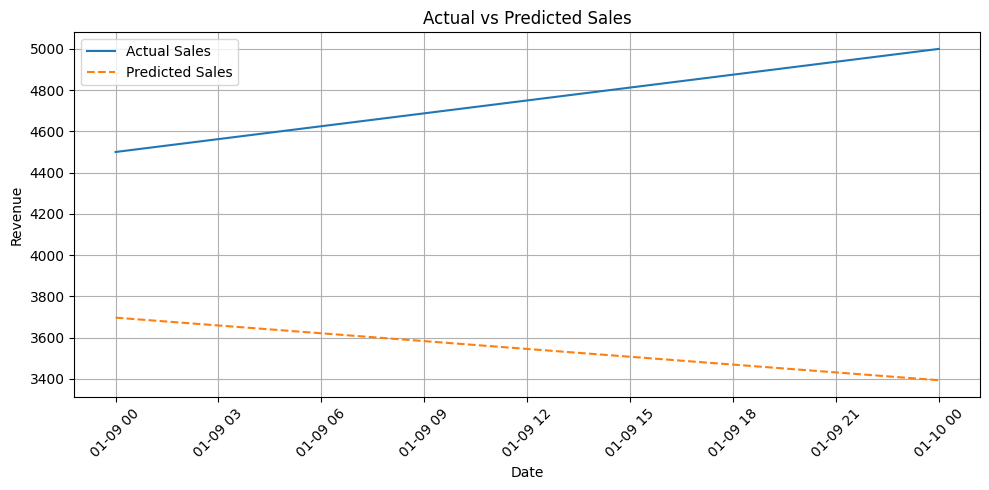

In [ ]:
# Predict revenue for test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['date'].iloc[-len(y_test):], y_test, label='Actual Sales')
plt.plot(daily_sales['date'].iloc[-len(y_test):], y_pred, label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Combine actual and predicted for comparison
result_df = pd.DataFrame({
    'Date': daily_sales['date'].iloc[-len(y_test):].values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred
})

result_df.head()


,Date,Actual_Sales,Predicted_Sales
0,2023-01-09,4500,3696.428571
1,2023-01-10,5000,3392.857143


In [ ]:
# Define how many future days to forecast
future_days = 30

# Create future dates
last_date = daily_sales['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Convert to ordinal
future_ordinals = future_dates.map(datetime.toordinal).values.reshape(-1, 1)

# Predict future revenue
future_predictions = model.predict(future_ordinals)

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Revenue': future_predictions
})

forecast_df.head()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Date,Predicted_Revenue
0,2023-01-11,3089.285714
1,2023-01-12,2785.714286
2,2023-01-13,2482.142857
3,2023-01-14,2178.571429
4,2023-01-15,1875.000000


## 📉 Visualizing Actual vs Predicted Sales

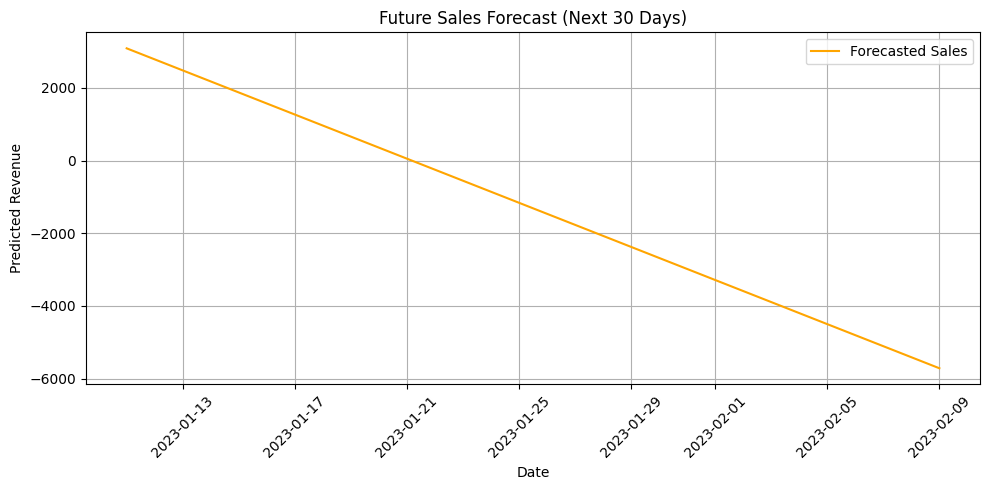

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_df['Date'], forecast_df['Predicted_Revenue'], label='Forecasted Sales', color='orange')
plt.xlabel('Date')
plt.ylabel('Predicted Revenue')
plt.title('Future Sales Forecast (Next 30 Days)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Interactive widgets
from ipywidgets import interact, widgets
import datetime as dt

# Define interactive date range selector
start_date = daily_sales['date'].min()
end_date = daily_sales['date'].max()

@interact(
    start=widgets.DatePicker(description='Start Date', value=start_date),
    end=widgets.DatePicker(description='End Date', value=end_date)
)
def plot_range(start, end):
    if start and end:
        mask = (daily_sales['date'] >= pd.to_datetime(start)) & (daily_sales['date'] <= pd.to_datetime(end))
        filtered = daily_sales[mask]

        plt.figure(figsize=(10, 4))
        plt.plot(filtered['date'], filtered['revenue'], label='Revenue')
        plt.title(f'Sales Revenue from {start} to {end}')
        plt.xlabel('Date')
        plt.ylabel('Revenue')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend()
        plt.show()


interactive(children=(DatePicker(value=Timestamp('2023-01-01 00:00:00'), description='Start Date'), DatePicker…

## 🔧 Training the Model

In [ ]:
# Group by product and date
product_sales = df.groupby(['product', 'date']).agg({'revenue': 'sum'}).reset_index()

# Choose a product to visualize
product_list = product_sales['product'].unique().tolist()

@interact(product=widgets.Dropdown(options=product_list, description='Product'))
def forecast_product(product):
    subset = product_sales[product_sales['product'] == product]
    subset = subset.groupby('date').agg({'revenue': 'sum'}).reset_index()
    subset['date_ordinal'] = subset['date'].map(datetime.toordinal)

    X = subset[['date_ordinal']]
    y = subset['revenue']
    model = LinearRegression()
    model.fit(X, y)

    # Forecast next 30 days
    future_dates = pd.date_range(start=subset['date'].max() + pd.Timedelta(days=1), periods=30)
    future_ordinal = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
    future_pred = model.predict(future_ordinal)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(subset['date'], y, label='Actual Sales')
    plt.plot(future_dates, future_pred, '--', label='Forecast')
    plt.title(f'Sales Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='Product', options=('Product A', 'Product B'), value='Product A'), …

## 📊 Evaluating Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE:  {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²:   {r2:.2f}')


MAE:  1205.36
RMSE: 1270.56
R²:   -24.83


In [ ]:
# Export forecast
forecast_df.to_csv('/content/drive/My Drive/sales_forecast_30_days.csv', index=False)
print("✅ Forecast saved to Google Drive!")


✅ Forecast saved to Google Drive!


In [ ]:
print("📊 Sales Summary:")
print(f"- Total revenue: ${daily_sales['revenue'].sum():,.2f}")
print(f"- Peak sales day: {daily_sales.loc[daily_sales['revenue'].idxmax(), 'date'].date()}")
print(f"- Average daily revenue: ${daily_sales['revenue'].mean():,.2f}")


📊 Sales Summary:
- Total revenue: $50,000.00
- Peak sales day: 2023-01-05
- Average daily revenue: $5,000.00


## 🧼 Data Cleaning

(10, 4)
date        datetime64[ns]
product             object
quantity             int64
revenue              int64
dtype: object


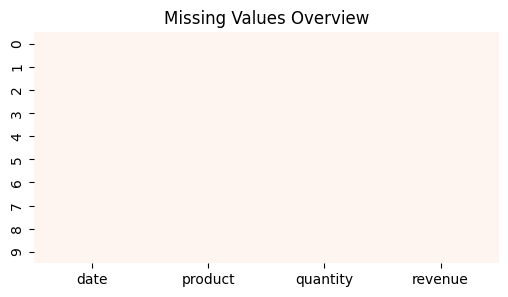

In [ ]:
# Quick overview
print(df.shape)
print(df.dtypes)
df.describe()

# Missing values heatmap
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Overview')
plt.show()


/tmp/ipython-input-19-4188106627.py:7: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


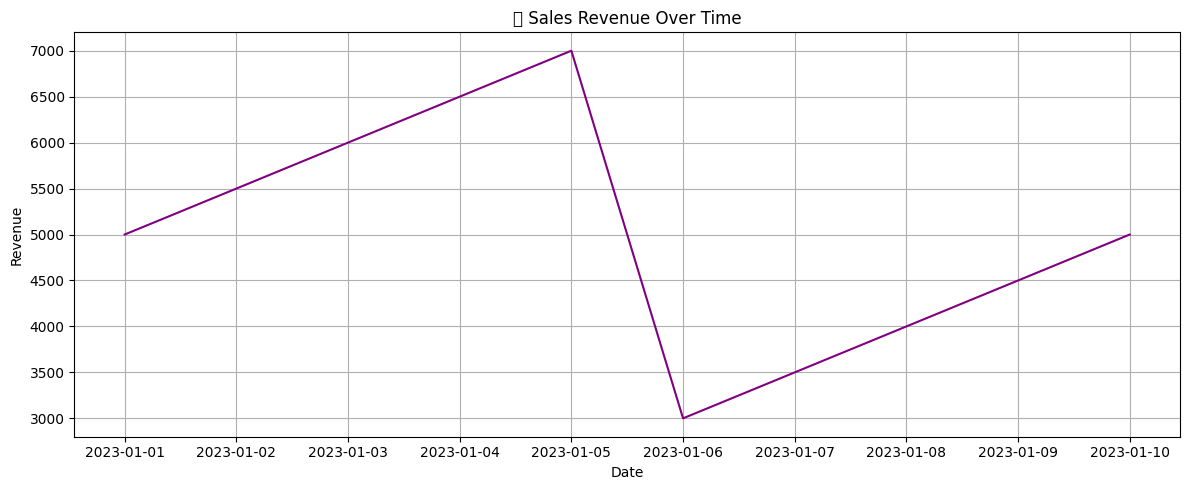

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(daily_sales['date'], daily_sales['revenue'], color='purple')
plt.title("📅 Sales Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()


In [ ]:
from ipywidgets import interact, widgets

@interact(
    product=widgets.Dropdown(options=df['product'].unique(), description='🛍️ Product'),
    days=widgets.IntSlider(value=30, min=7, max=90, step=7, description='🔮 Days Ahead')
)
def forecast_interactive(product, days):
    # Filter and group data
    subset = df[df['product'] == product]
    product_daily = subset.groupby('date').agg({'revenue': 'sum'}).reset_index()
    product_daily['date_ordinal'] = product_daily['date'].map(datetime.toordinal)

    # Train model
    X = product_daily[['date_ordinal']]
    y = product_daily['revenue']
    model = LinearRegression()
    model.fit(X, y)

    # Predict future
    future_dates = pd.date_range(start=product_daily['date'].max() + pd.Timedelta(days=1), periods=days)
    future_ordinals = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
    forecast = model.predict(future_ordinals)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(product_daily['date'], y, label='📈 Actual Sales', color='blue')
    plt.plot(future_dates, forecast, '--', label='🔮 Forecast', color='orange')
    plt.title(f'Sales Forecast for {product} (Next {days} Days)')
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='🛍️ Product', options=('Product A', 'Product B'), value='Product A'…

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation
print("📊 Model Evaluation:")
print(f"🔹 MAE:  {mean_absolute_error(y_test, y_pred):.2f}")
print(f"🔹 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"🔹 R²:   {r2_score(y_test, y_pred):.2f}")


📊 Model Evaluation:
🔹 MAE:  1205.36
🔹 RMSE: 1270.56
🔹 R²:   -24.83


/tmp/ipython-input-22-1156155602.py:9: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


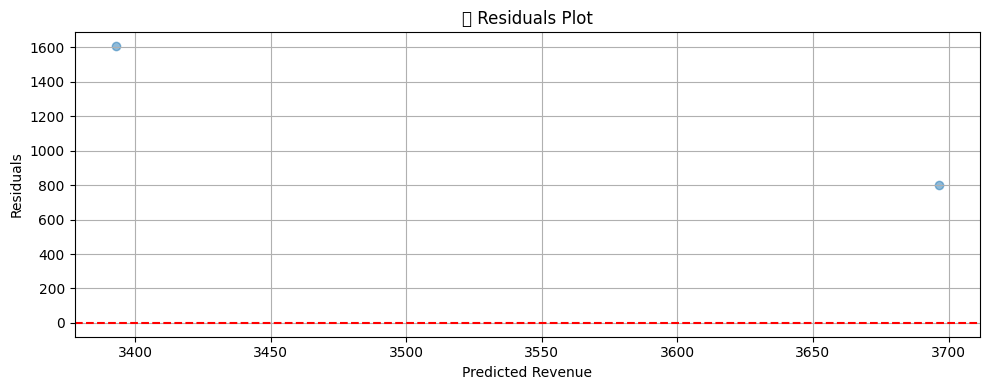

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('🔎 Residuals Plot')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
forecast_df.to_csv('/content/drive/My Drive/final_forecast.csv', index=False)


## 🌐 Exporting to Google Sheets (Optional)

In [1]:
!pip install --upgrade gspread gspread_dataframe


In [5]:
import pandas as pd
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
from google.auth import default

# Authenticate user
auth.authenticate_user()

# Get credentials
creds, _ = default()

# Authorize gspread with credentials
gc = gspread.authorize(creds)


In [6]:
# Example DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=12, freq='M'),
    'Actual_Sales': [100, 120, 130, 125, 150, 160, 170, 180, 190, 200, 210, 220],
    'Forecasted_Sales': [110, 115, 128, 130, 145, 155, 165, 175, 185, 195, 205, 215]
})


/tmp/ipython-input-6-2703421800.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2024-01-01', periods=12, freq='M'),


In [7]:
# Create a new spreadsheet in your Google Drive
spreadsheet = gc.create('Sales Forecasting Data')

# Open the first worksheet
worksheet = spreadsheet.get_worksheet(0)

# Upload the DataFrame to the worksheet
set_with_dataframe(worksheet, df)


In [8]:
!git config --global user.email "anish241a@gmail.com"
!git config --global user.name "Anish240104"


In [24]:
!git clone https://github.com/Anish240104/sales_forcasting_project.git


Cloning into 'sales_forcasting_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [25]:
!ls "/content/drive/MyDrive/Colab Notebooks"


'Copy of sales_forecasting_project.ipynb'   Untitled0.ipynb
'Copy of Untitled2.ipynb'		   'Untitled1 (1).ipynb'
 Ghhh.ipynb				    Untitled1.ipynb
 Sales_forcasting.ipynb			    Untitled2.ipynb
 Sales_forcasting_project.ipynb		    Untitled3.ipynb
 sales_forecasting_project.ipynb	    Untitled4.ipynb
 Untitled


In [27]:
!cp "/content/drive/MyDrive/Colab Notebooks/sales_forecasting_project.ipynb" /content/sales_forcasting_project/
